# Neural network model for classifying handwritten digits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential

## Load dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Explore dataset

In [3]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("\nTesting images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)

Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


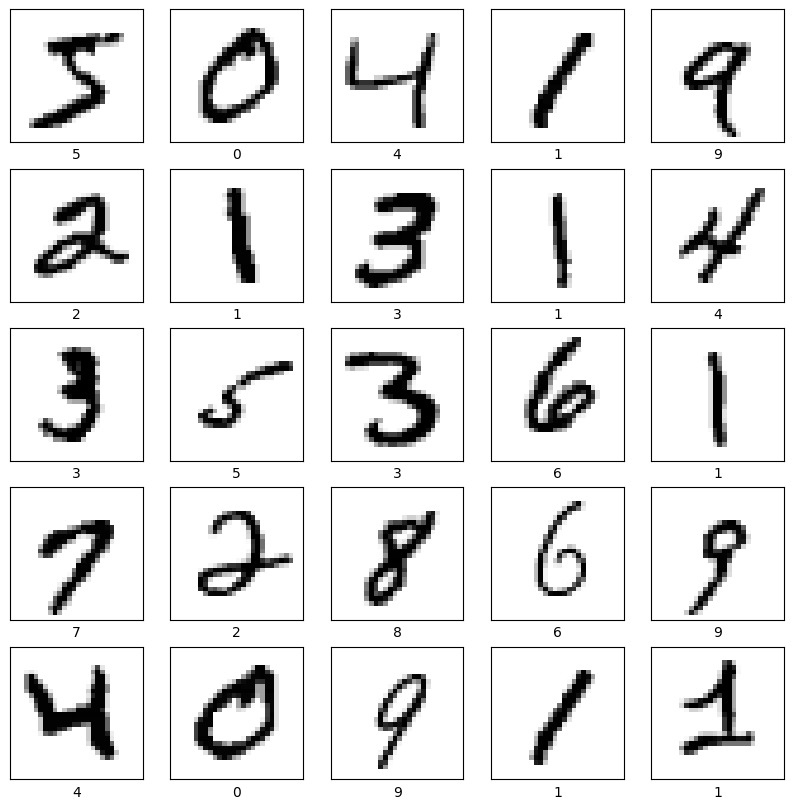

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Pre-process dataset

As we can see, the vaules of the pixels (for example in row 21 of the first image in the train dataset) range from 0 to 255. Let's scale these values ​​in a range of 0 to 1.

In [5]:
train_images[0][21]

array([  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
       253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
train_images[0][21]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09019608, 0.25882353,
       0.83529412, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.77647059, 0.31764706, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Neuronal Network Model

Network architecture:
- Convolutional layer with 20  feature maps, 5 by 5 local receptive fields and a stride length of 1.
- Max-pooling layer that pulls over 2 by 2 regions.
- Convolutional layer with 40 feature maps, 5 by 5 local receptive fields and a stride length of 1.
- Max-pooling layer that pulls over 2 by 2 regions.
- Fully-connected layer with 1000 neurons using RELU activation.
- Fully-connected layer with 1000 neurons using RELU activation.
- Output layer with 10 neurons using softmax activation.

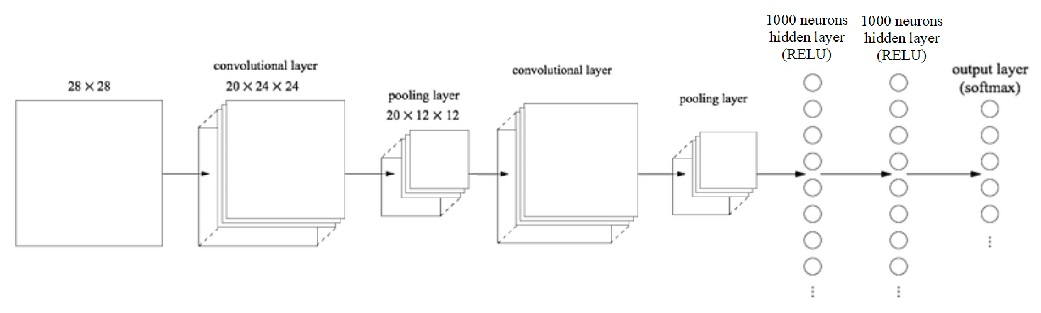


In [8]:
model = Sequential([
    Conv2D(filters=20, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=40, kernel_size=(5, 5), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1000, activation="relu"),
    Dropout(0.5),
    Dense(1000, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

Compile the network using stochastic gradient descent optimizer and cross-entropy loss function.

In [9]:
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Train the network.

In [10]:
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 52s 27ms/step - loss: 0.6232 - accuracy: 0.7985
Epoch 2/40
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1652 - accuracy: 0.9493
Epoch 3/40
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1184 - accuracy: 0.9632
Epoch 4/40
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0966 - accuracy: 0.9710
Epoch 5/40
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0819 - accuracy: 0.9747
Epoch 6/40
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0705 - accuracy: 0.9776
Epoch 7/40
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0632 - accuracy: 0.9805
Epoch 8/40
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0588 - accuracy: 0.9818
Epoch 9/40
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 10/40
1875/1875 [==============================] - 50s 27m

Evaluate the model on test data.

In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0205 - accuracy: 0.9928


[0.020485160872340202, 0.9927999973297119]

## Make predictions

In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [13]:
def plot_image(prediction, true_label, img):
    """
    Plots an ``image`` along with its predicted label and true label.

    Args:
    - prediction (numpy.ndarray): The predicted label probabilities.
    - true_label (int): The true label for the image.
    - img (numpy.ndarray): The image data.
    """

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(prediction):.0f}%) Correct: {true_label}")


def plot_bar_chart(prediction, true_label):
    """
    Plots a ``bar chart`` showing the predicted label probabilities.

    Args:
    - prediction (numpy.ndarray): The predicted label probabilities.
    - true_label (int): The true label for the image.
    """

    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Plot the first X test images, their predicted labels, and the true labels.

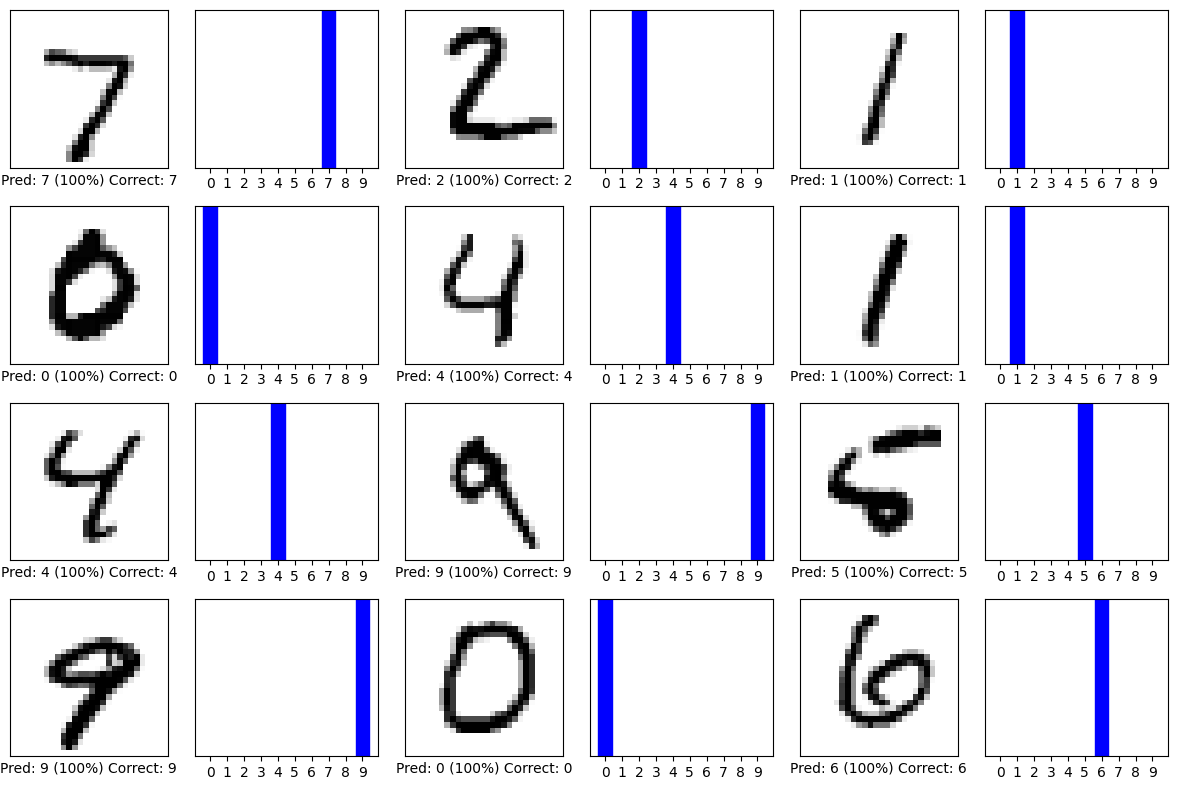

In [14]:
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):

    # Left subplot for the image
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])

    # Right subplot for the prediction plot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_bar_chart(predictions[i], test_labels[i])

plt.tight_layout()
plt.show()

## Errors

Creates the list errors which contains the indexes of the test images that the neural network model could not classify correctly.

In [15]:
errors = []

for i in range(len(predictions)):
    
    if np.argmax(predictions[i]) != test_labels[i]:
        
        errors.append(i)

print(f"Failed {len(errors)} out of {len(predictions)} predictions")

Failed 72 out of 10000 predictions


Plot the miss predicted test images, their predicted labels, and the true labels.

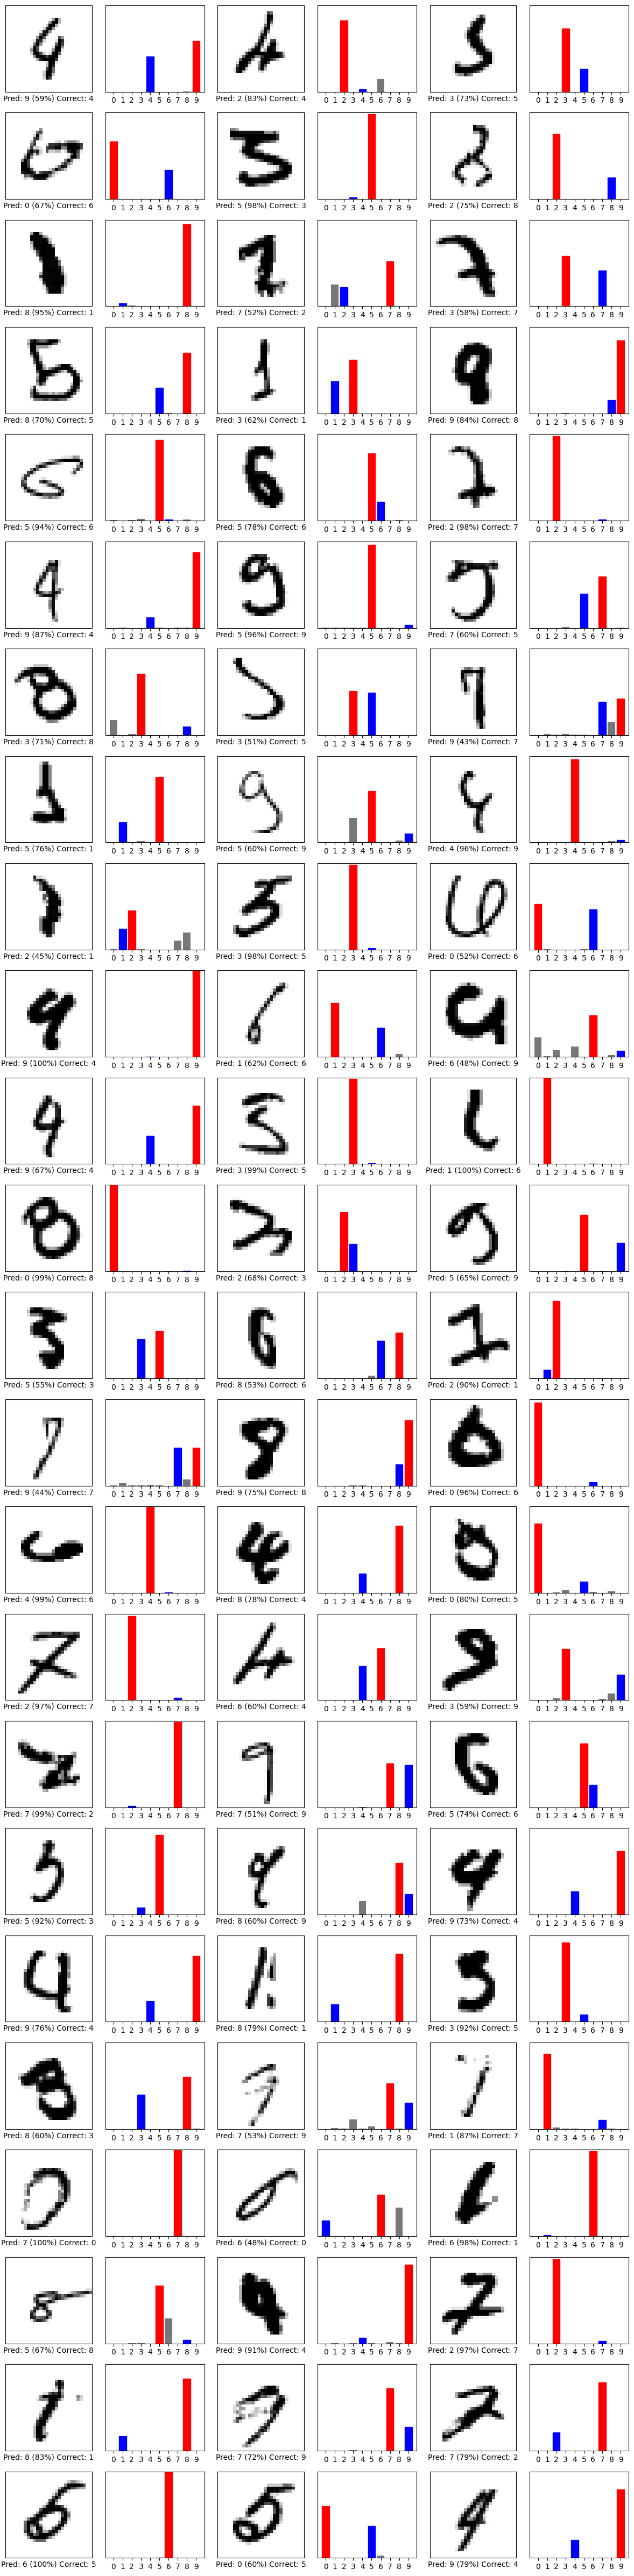

In [16]:
num_cols = 3
num_rows = len(errors) // num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Counter for the subplots
j=0

for i in errors:

    # Left subplot for the image
    plt.subplot(num_rows, 2*num_cols, 2*j+1)
    plot_image(predictions[i], test_labels[i], test_images[i])

    # Right subplot for the prediction plot
    plt.subplot(num_rows, 2*num_cols, 2*j+2)
    plot_bar_chart(predictions[i], test_labels[i])

    j+=1

plt.tight_layout()
plt.show()